<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUC with TensorFlow 2

* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics
* https://github.com/dariyasydykova/open_projects/tree/master/ROC_animation

In [0]:
# for colab, you might see an error, but never mind
!pip install -q tf-nightly-gpu-2.0-preview

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190606


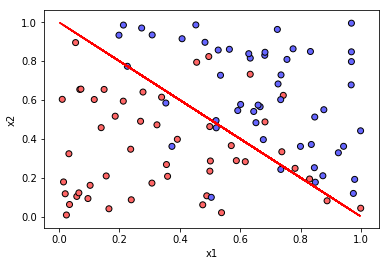

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

a = -1
b = 1
n = 100

# all points
X = np.random.uniform(0, 1, (n, 2))

# our line
line_x = np.random.uniform(0, 1, n)
line_y = a*line_x+b
plt.plot(line_x, line_y, 'r')

# below and above line
noise = 0.3 * np.random.normal(0, 1, n)
y = X[:, 1] > a*X[:, 0]+b + noise
y = y.astype(int)

plt.xlabel("x1")
plt.ylabel("x2")

plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['#FF6666', '#6666FF']), marker='o', edgecolors='k')

x = tf.constant(X, dtype='float32')
y_true = tf.constant(y, dtype='float32')

In [4]:
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics/Accuracy

m = tf.keras.metrics.Accuracy()
m.update_state([1, 2, 3, 4], [0, 2, 3, 4])
accuracy = m.result().numpy()
accuracy

0.75

In [5]:
m = tf.keras.metrics.Accuracy()
m.update_state([0, 0, 1, 1], [0.3, 0.1, 0.6, 0.8])
accuracy = m.result().numpy()
accuracy

0.0

In [6]:
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics/BinaryAccuracy

m = tf.keras.metrics.BinaryAccuracy()
m.update_state([0, 0, 1, 1], [0.3, 0.1, 0.6, 0.8])
accuracy = m.result().numpy()
accuracy

1.0

In [7]:
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics/BinaryAccuracy

m = tf.keras.metrics.BinaryAccuracy(threshold=0.9)
m.update_state([0, 0, 1, 1], [0.3, 0.1, 0.6, 0.8])
accuracy = m.result().numpy()
accuracy

0.5

In [8]:
from tensorflow.keras.layers import Dense
 
model = tf.keras.Sequential()

model.add(Dense(units=1, activation='sigmoid', input_dim=2))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
%%time 

EPOCHS=100
loss_fn = tf.losses.binary_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)
threshold = 0.5

accuracy_metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)

model.compile(loss=loss_fn,
             optimizer=optimizer,
             metrics=[accuracy_metric])

history = model.fit(x, y_true, epochs=EPOCHS, verbose=0)

W0606 20:09:18.266235 140619748513664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1251: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


CPU times: user 1.65 s, sys: 244 ms, total: 1.89 s
Wall time: 1.7 s


In [10]:
loss, accuracy = model.evaluate(x, y_true)
loss, accuracy

100/100 [==============================] - 0s 367us/sample - loss: 0.3678 - binary_accuracy: 0.8500


(0.3677712941169739, 0.85)

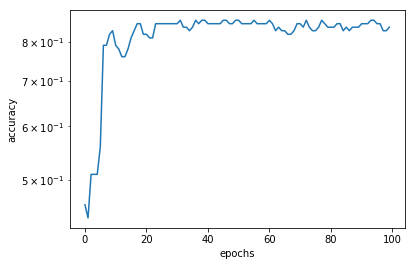

In [11]:
plt.yscale('log')
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['binary_accuracy'])

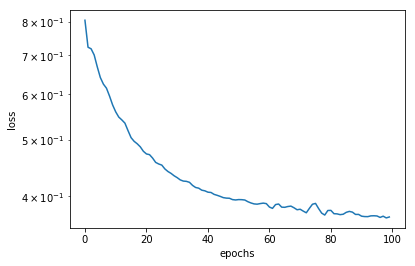

In [12]:
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epochs")

plt.plot(history.history['loss'])

In [13]:
y_pred = tf.squeeze(model.predict(x))
y_pred

<tf.Tensor: id=3845, shape=(100,), dtype=float32, numpy=
array([0.12715238, 0.9416169 , 0.75302744, 0.8913896 , 0.74437624,
       0.874833  , 0.9035452 , 0.09901446, 0.23318422, 0.61847264,
       0.79687923, 0.2207857 , 0.78427315, 0.7987652 , 0.01128137,
       0.78798425, 0.01268053, 0.00968251, 0.55734175, 0.8828969 ,
       0.69787943, 0.97543836, 0.12382358, 0.6981795 , 0.09799436,
       0.88215387, 0.01517662, 0.8045918 , 0.9300964 , 0.1625368 ,
       0.10845792, 0.9251983 , 0.38215676, 0.02898517, 0.6984464 ,
       0.0969314 , 0.16004425, 0.41683698, 0.7972832 , 0.45254254,
       0.3753178 , 0.9864241 , 0.8342943 , 0.7407539 , 0.99491405,
       0.97718865, 0.01321408, 0.1291712 , 0.06393191, 0.62103814,
       0.87564325, 0.25614798, 0.20547724, 0.9050621 , 0.61090785,
       0.02860019, 0.97046757, 0.16409248, 0.7539909 , 0.9190371 ,
       0.9087173 , 0.65095127, 0.42956153, 0.8771692 , 0.03293186,
       0.68877494, 0.27110696, 0.95697224, 0.97563386, 0.71624833,
     

## We are drawing a sigmoid in 3d and turn it into a step

<img src='https://github.com/DJCordhose/ml-workshop/blob/master/notebooks/tf2/img/logistic.jpg?raw=1'>

In [14]:
y_pred_binary = (y_pred > threshold).numpy().astype(float)
y_pred_binary

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.])

In [15]:
misclassified = y_true - y_pred_binary
misclassified

<tf.Tensor: id=3851, shape=(100,), dtype=float32, numpy=
array([ 0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,
        0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.], dtype=float32)>

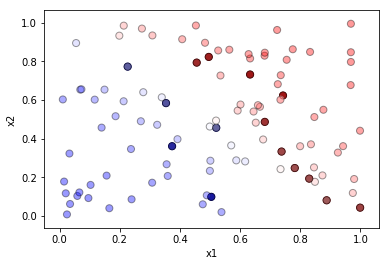

In [16]:
# https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html

# strong colors are misclassified

plt.xlabel("x1")
plt.ylabel("x2")

plt.scatter(X[:,0], X[:,1], c=misclassified, cmap=ListedColormap(['#600000', '#FFFFFF', '#000060']), marker='o', s=50)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.bwr, marker='o', edgecolors='k', alpha=0.4, s=50)

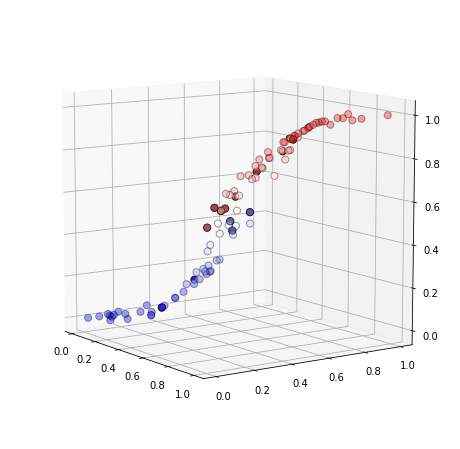

In [17]:
# uncomment for interactive 3d on local jupyer notebook
# %matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y_pred, c=misclassified, cmap=ListedColormap(['#600000', '#FFFFFF', '#000060']), marker='o', 
           s=50,
           depthshade=False)

ax.scatter(X[:, 0], X[:, 1], y_pred, c=y_pred, 
           cmap=plt.cm.bwr,
           depthshade=False,
           s=50,
           marker='o', edgecolors='k', alpha=0.4)

# https://en.wikipedia.org/wiki/Azimuth
ax.view_init(elev=10, azim=-35)